# **Research Workshop code**



 ## **To dos:** 
1.  **Combine dataset** ✅

2.  **Import dataset**✅

3.  **Preprocessing**
> * Extracting reviews from data ✅
> * Conversion to lower case  ✅
> * Define symbols to remove from string - still has to be checked ❗
> * Remove punctuation marks and symbols ✅
> * Tokenization - Separation into individual words ✅
> * Define stop words - still room for improvement ❗
> * Remove stop words - words that don't provide semantic content (use standard library + extra words found in stopword file at drugs.com) ✅
> * Lemmatization - Conversion to the root from which word is inflicted ✅
> * Stemmatizing? - we are not gonna use that ❗
> * Adding sentiment score to dataframe ✅

4. **Data analysis (ideas)** 
> * Extracting pos., neutral, and neg. reviews ✅
> * Extracting words from pos., neutral, neg. reviews ? ✅ 
> * Wordcloud to check most prevalent words and find more stopwords ✅

5. **Vectorization**
> * TF-IDF transformation ✅
> * use of bigrams? ❗

6. **Splitting dataset** 
> * Training: 80 % ✅
> * Validation: 10 % ✅
> * Test: 10 % ✅

7.  **Building model**
> * parameter tuning ❗
> * Random forest (Ann)✅
>> *Hyperparameters to tune:*❗
>> * n_estimators: btw. 500 and 1000 -> use big number
>> * max_depth = [2,100,None]
>> * min_samples_split = [2,10,..] -> use big numbers
>> * bootstrap = True 
>> *  max_samples = ? 
>> * feature_importances = ? 
>> * max_feature = "auto" (default)
>> * criterion = "gini" (default)
>> * "DONT use random_state" (Federico)
> * Naive Bayes 
>> *Hyperparameters to tune:*
>> * ❓

8.  **Model evaluation** (Anita)❗
> * Classification accuracy
> * precision, recall, F-score
> * confusion matrices
> * p-value (recommended by Federico)
> * Check correlation btw. predictor and outcome (recommended by Federico)

9. **Feature extraction**❗
> * extract most important features, serving as predictors for 5 diseases (ADHD, Anxiety, Bipolar disorder, Depression, and Schizophrenia)

### **Importing relevant packages**

In [152]:
# install nltk
#!pip install nltk

In [153]:
# nltk - sentiment analysis
import nltk                       
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "averaged_perceptron_tagger",
     "wordnet",
     "vader_lexicon",
     "punkt"])

# word tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

# stop words 
from nltk.corpus import stopwords

# lemmatizer
from nltk.stem import WordNetLemmatizer

#word stemmer
from nltk.stem import PorterStemmer

#wordcloud
from wordcloud import WordCloud # word cloud

# text
from nltk.text import Text

# tf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

import sklearn.metrics  
# balancing data 
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Konsalian\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Konsalian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Konsalian\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Konsalian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Konsalian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Konsalian\AppData\Roaming\nltk_data...
[nltk_data]   Package 

In [154]:
import numpy as np                  #linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #For Visualisation
%matplotlib inline

In [155]:
# sklearn
# train-test-split and GridSearch cross-validation
from sklearn.model_selection import train_test_split, GridSearchCV

# import Random Forest model and Naive Bayes 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


### **Loading the dataframe and getting some descriptive statistic**

**Note**: I am not 100 % sure whether the following block works for everyone or whether it depends on your personal drive. 
I tried to connect Google collab with the drive to find the "BaseFeatures.csv" file. If it does not work, you have to manually upload the file to Google collab. 

In [156]:
# read the file 
# try this code if Google collab is connected to the drive

from os import getcwd, listdir, chdir 
from os.path import join
diseases = ["ADHD",'Anxiety', 'Bipolar', 'Depression', 'Schizophrenia']
frames = []

for i in diseases:
  frame = pd.read_csv(f"{i}.csv",index_col=0) 
  #frame_filename = join(getcwd(), f"{i}.csv")      # I commented the above out, and made it to a pathway that can work for everybody
  #frame = pd.read_csv(frame_filename, index_col=0)
  frame["Drug"] = i
  frames.append(frame)

data = pd.concat(frames)

print(data)
#data = pd.read_csv("/content/drive/MyDrive/Research workshop/BaseFeatures.csv")

# manually upload the dataframe if the above code does not work and use the following code instead: 
#data = pd.read_csv("BaseFeatures.csv") 
#print(data)

                                                               Review  Score  \
Drug                                                                           
Dexmethylphenidate  I have a 5 year old son. He started this medic...      1   
Dexmethylphenidate  This dexmethylphenidate is the only medication...     10   
Dexmethylphenidate  <b>Focalin (dexmethylphenidate):</b>\t\t\t Im...      0   
Dexmethylphenidate  <b>Focalin XR (dexmethylphenidate):</b>\t\t\t ...      0   
Dexmethylphenidate  I've been on Focalin XR 30mg from 15-17 and fr...     10   
...                                                               ...    ...   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t Invega is ...      0   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t I've had a...      0   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t My daughte...      0   
Paliperidone        <b>Invega (paliperidone):</b>\t\t\t Clears my ...      0   
Paliperidone        <b>Invega (paliperid

In [157]:
data = data.loc[data['Score'] >= 1] 

1     1517
2      458
3      425
4      323
5      529
6      440
7      698
8     1507
9     2018
10    3292
Name: Score, dtype: int64


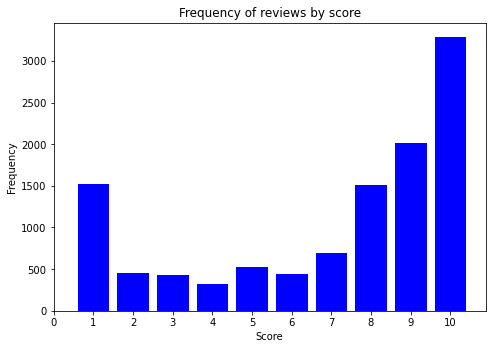

In [158]:
score_counts = data["Score"].value_counts(sort=True).sort_index()
print(score_counts)
score_counts = np.array(score_counts)
scores = list(range(1,11))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(scores,score_counts,linestyle='--', color='b')
ax.set_xticks(np.arange(len(scores)+1))
ax.set_ylabel('Frequency')
ax.set_xlabel("Score")
ax.set_title('Frequency of reviews by score')
plt.show()

missing values:
 Review    0
Score     0
Likes     0
Drug      0
dtype: int64
original dataset:
 <bound method NDFrame.head of                                                                Review  Score  \
Drug                                                                           
Dexmethylphenidate  I have a 5 year old son. He started this medic...      1   
Dexmethylphenidate  This dexmethylphenidate is the only medication...     10   
Dexmethylphenidate  I've been on Focalin XR 30mg from 15-17 and fr...     10   
Dexmethylphenidate  Really didn't like Focalin. It was the first m...      2   
Dexmethylphenidate  I was previously on Concerta, which just made ...      8   
...                                                               ...    ...   
Paliperidone        I have been on this paliperidone for 2 years. ...      9   
Paliperidone        This medication appears to have no side effect...      8   
Paliperidone        I have been on Paliperidone for nearly 2 weeks...    

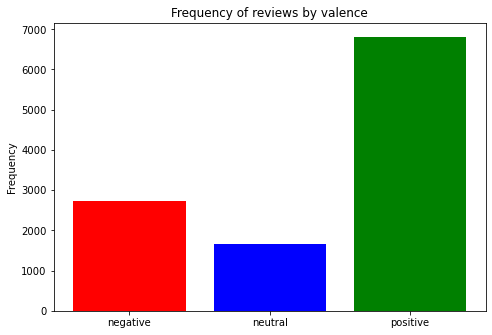

In [159]:

# checking for missing values 
print("missing values:\n",data.isnull().sum())

# checking the head and tail of the file 
print("original dataset:\n",data.head)

# extracting positive, neutral and negative reviews: 
neg_data = data[data.Score <= 4] # 0-4 -> neg. reviews
neutral_data = data[(data.Score > 4) & (data.Score < 8)] # 5-7 -> neutral reviews
pos_data = data[data.Score >=8 ] # 8-10 -> pos. neg_reviews

print("\nnegative dataset: ",neg_data.shape)
print("neutral dataset: ",neutral_data.shape)
print("positive dataset: ",pos_data.shape,"\n")

# creating a new column with the polarity score 
def polarity_label(score):
  if score <= 4:
    return 0
  elif score > 4 and score < 8:
    return 1
  else:
    return 2

sentiment = []
for i in data.Score:
  s = polarity_label(i)
  sentiment.append(s)

data["Sentiment"] = sentiment
print("extended dataset: \n",data.head)

# combine all polarity frequencies into a list
polarity = ['negative', 'neutral', 'positive']
scores = [neg_data.shape[0], neutral_data.shape[0], pos_data.shape[0]]

for i in range(len(polarity)):
  print(f"length of {polarity[i]} reviews: {scores[i]}")

# plotting reviews
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(polarity,scores,color = ("r","b","g"))
ax.set_ylabel('Frequency')
ax.set_title('Frequency of reviews by valence')
plt.show()

### **Extracting pos, neg., neutral words**

In [160]:
# writing function first that receives a dataframe and outputs four string with all words, based on the sentiment column
def extract_sentiment_words(data, col_review = "Review", col_sentiment = "Sentiment"): 
  # constructing a string since this is required for the WordCloud 
  words_as_string = "" # all words
  poswords_as_string = "" # words from pos. reviews
  neutralwords_as_string = "" # words from neutral reviews
  negwords_as_string = "" # words from neg. reviews 

  for r in range(len(data[col_review])):
    text = data[col_review][r] # extracting review (string)
    polarity = data[col_sentiment][r] # extracting polarity score (0,1,2)
    words_as_string += text # adding review to string
    if polarity == 0:          # checking whether review is negative
      negwords_as_string += text 
    elif polarity == 1:        # checking whether review is neutral
      neutralwords_as_string += text
    elif polarity == 2:        # checking whether review is positive
      poswords_as_string += text
  return words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string

In [161]:
# making Reviews lower-case
data["Review"] = data["Review"].str.lower() 

print("Shape of Reviews: ",data["Review"].shape)
print("Type of Reviews:", type(data["Review"]))

# getting 4 strings with all, pos, negative and neutral words
words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string = extract_sentiment_words(data) 

print(type(words_as_string)) # now we have a string we can work with 
print(f"pos string: {poswords_as_string[:100]}...")
print(f"length of pos strings:{len(poswords_as_string)}, length of neutral strings: {len(neutralwords_as_string)}, length of negative strings: {len(neutralwords_as_string)}")

Shape of Reviews:  (11207,)
Type of Reviews: <class 'pandas.core.series.Series'>
<class 'str'>
pos string: this dexmethylphenidate is the only medication i have tried thus far for my adhd that has had a good...
length of pos strings:3472603, length of neutral strings: 845263, length of negative strings: 845263


###**Trying to remove reviews with score 0 and positive review**

### **Generating word cloud (1) - before cleaning**

In [162]:
# function to generate word clouds
def display_wordcloud(axes, list_of_strings, names):
  # Display the generated image:
  # I now loop over all words, the pos.,neg.,neutral words and generate a wordcloud for all of them (this gives us 4 plots in total)
  for iAx, txt, tlt in zip(axes,list_of_strings, names):
    plt.figure(iAx,figsize=(12,12))
    # getting the wordcloud of all words, pos/neg/neutral words 
    wordcloud = WordCloud().generate(txt)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"{tlt}")
    plt.axis("off")

  plt.show()

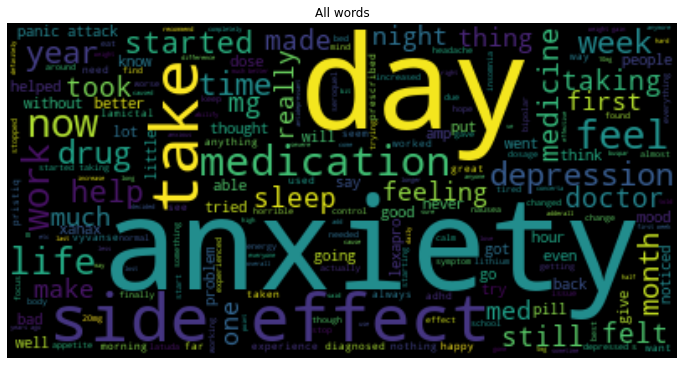

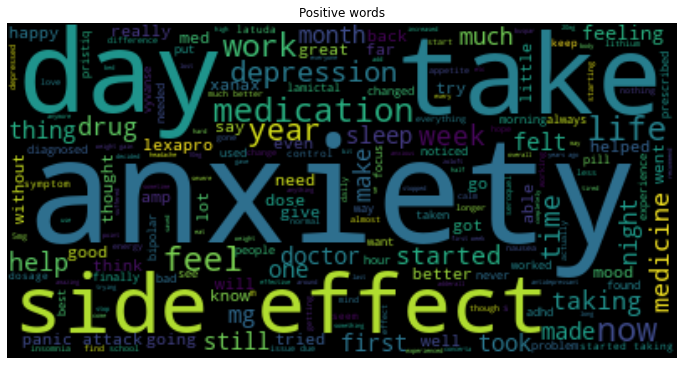

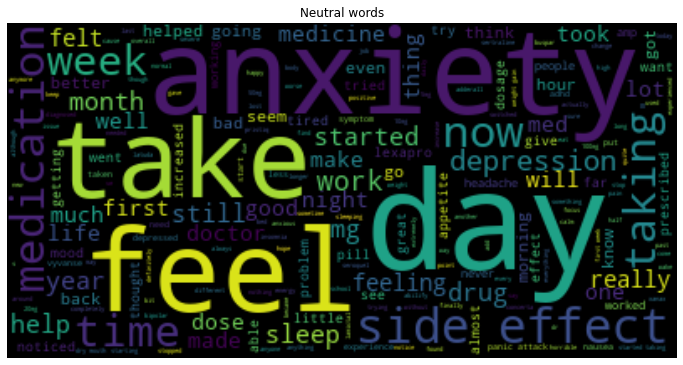

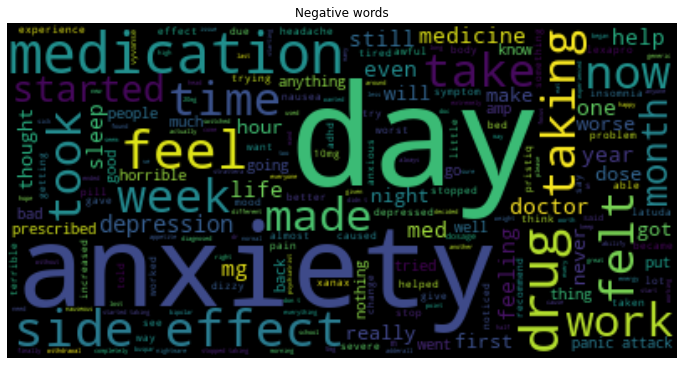

In [163]:
display_wordcloud([0,1,2,3], [words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string], \
                  ["All words","Positive words", "Neutral words","Negative words"])

### **Getting frequency distributions(1) - before cleaning** 

### **Functions for removing stop words and cleaning text**

In [164]:
# function that gets list as input and converts all elements into lower-case
import string as st

# puts list of strings into lowercase
def lower(mylist): # tokens is a list of strings
  lowertokens = []
  for t in mylist:
    lowertokens.append(t.lower())
  return lowertokens

# removes punctuation signs of a string
def removePunctuation(string, punctuation = st.punctuation): #st.punctuation is an inbuilt list of punctuation signs
  cleaned = ""
  for c in string:
    if c not in punctuation:
      cleaned += c
  return cleaned

# removes spaces of a string
def removeSpaces(string):
  while " " in string:
    string = string.replace(" ","")
  return string

#gets root of word
def Lemmatizer(tokens):
  newtokens = []
  lemmatizer = WordNetLemmatizer()
  for word in tokens:
    newtokens.append(lemmatizer.lemmatize(word))
  return newtokens

# gets word stem 
def Stemmer(tokens):
  newtokens = []
  ps = PorterStemmer()
  for word in tokens:
    newtokens.append(ps.stem(word))
  return newtokens

# function that removes stopwords from a given list of words
def removeStopWords(tokens, stopwords): # tokens and stopwords are lists
  newtokens = []
  for t in tokens: # going over words in tokens 
    for med in medicine:
      if med in t:
        break
    else:
      t = removeNum(t)
      if t not in stopwords:
        newtokens.append(t) #appending cleaned word to list if it is not a stopword
  
  newtokens = list(filter(None, newtokens))

  if len(newtokens) < 1:
    return np.nan
  
  return newtokens

def removeNum(word):
  number = " 01234567890"
  w = ""
  for i in word:
    if i not in number:
      w += i
  return w

# function for generating n-grams
def generate_N_grams(tokens,ngram=1):
  ngrams = []
  for w in range(len(tokens)-ngram): 
    ngrams.append([" ".join(tokens[w:w+ngram])]) # generates n-grams 
  return ngrams

# this is the main function that cleans the whole Review column, using the functions from above 
def cleaning_reviews(df_col, stopwords ):
  df_col = df_col.apply(removePunctuation)# remove punctuation and symbols
  df_col = df_col.str.split(" ") # tokenizing text
  #df_col = df_col.apply(Lemmatizer) # lemmatizing text
  #df_col = df_col.apply(Stemmer) # stemming text
  df_col = df_col.apply(removeStopWords, args=(stopwords,)) # removing stop words
  return df_col

def token_to_string(tokens): # gets tokens and returns string
  return " ".join(tokens)

# cleaning function for strings
def cleaning_string(words, stopwords):
  words = removePunctuation(words) # remove punctuation and symbols
  words = word_tokenize(words) # tokenizing text
  #words = Lemmatizer(words) # lemmatizing text
  #words = Stemmer(words) # stemming text
  words = removeStopWords(words,stopwords) # removing stop words
  return words

### **Defining stop words**

In [165]:
from os import listdir, getcwd, chdir
from os.path import join
# creating lists of stopwords 
wordsToRemove = []

# reading file with names of medicines which we want to add to the stop words
medicine = pd.read_csv("Useful/Auxiliar/Estructuras.csv")
#medicine_file = join(getcwd(), "Estructuras.csv") 
#medicine = pd.read_csv(medicine_file)
medicine = medicine["Name"] # getting medicine names out of dataframe
medicine = list(medicine) # converting it to a list
medicine = lower(medicine)
print("First 5 medicine stopwords: ",medicine, "checking medicine type: ",type(medicine))
wordsToRemove.extend(medicine) # appending medicines to stopwords

# reading file with words to be removed, provided by drugs.com
word = open("Useful/WordsToRemove.txt")  # I commented this one out, and made a line with a pathway you can use when files are downloaded and uploaded in the colab file
#word_filename = join(getcwd(), "WordsToRemove.txt")
#word = open(word_filename)
givenstopwords = word.readlines()
for i in range(len(givenstopwords)): #  cleaning the words form the file since there is newline character after each word
  givenstopwords[i] = givenstopwords[i].replace("\n","") 
print("First 5 entries of WordsToRemove stopwords: ",givenstopwords[:5])
wordsToRemove.extend(givenstopwords) # appending words to stopwords

# adding more words and characters to be removed: 
wordsToRemove.extend(["amp","d","t","s","ve","m","a", "im", "like", "years"])
wordsToRemove.extend([" d", "n t"," m","/b","ll", "b"])
wordsToRemove.extend([">","<",":",";","&","%","(", ")", "!", "  ", ",",".", "'", " ", ",","''","-" ])


First 5 medicine stopwords:  ['abilify', 'abilify maintena', 'adderall', 'adderall xr', 'adzenys er', 'adzenys xr-odt', 'alprazolam intensol', 'anafranil', 'aplenzin', 'aptensio xr', 'aristada', 'ativan', 'aventyl hydrochloride', 'buspar', 'budeprion sr', 'budeprion xl', 'caplyta', 'celexa', 'clozaril', 'concerta', 'cotempla xr-odt', 'cymbalta', 'daytrana', 'depakote', 'depakote er', 'deplin', 'desoxyn', 'desyrel', 'dexedrine', 'diazepam intensol', 'dyanavel xr', 'effexor', 'effexor xr', 'emsam', 'equetro', 'evekeo', 'fanapt', 'fetzima', 'focalin', 'focalin xr', 'forfivo xl', 'geodon', 'intuniv', 'invega', 'invega sustenna', 'invega trinza', 'kapvay', 'lamictal', 'lamictal odt', 'latuda', 'lexapro', 'lithobid', 'lorazepam intensol', 'marplan', 'metadate cd', 'methylin', 'methylin er', 'mydayis', 'nardil', 'norpramin', 'pamelor', 'parnate', 'paxil', 'paxil cr', 'pexeva', 'pristiq', 'procentra', 'prozac', 'quillivant xr', 'remeron', 'remeron soltab', 'rexulti', 'risperdal', 'risperdal co

#**Here you can add words to be removed. just add them into the meaningless_Words list and they will be removed from the models.**#
Just try to find multiple to test on because the models take a long time to run, around 30-40 minutes to rerun the whole doc. Which is necessary when taking words out at the beginning.

In [166]:
meaningless_words = ["feel", "day", "prozac","bprozac", "fluoxetine", "medicine", "drug","year", "week", "month", "taking","xr","xl","mg"] # looking at the cloud,   took (, "depression", "anxiety") out of the list given that they may influence the algorithms and need to stay in (Chris)
meaningless_words += ["got", "made", "get", "ive", "would", "also", "started", "bklonopin","bvistaril", "took", "months", "weeks", "bwellbutrin", "youll", "side", "effects"] # words that are important, but don't really have meaning, removed after the frequency histograms
meaningless_words += ["son","grades","dont", "really", "much","anxiety","days","foxus","worked","appetite","ok","best","tried","changed","hallucinations","voices","paranoia","symptoms","overall","less","gain","gained","schizophrenia","cant","since","back","makes","effect","help","make","depression","depressed","know","things","mood","eating","disorder","however","diagnosed","attacks","panic","prescribed","batarax","didnt","hours","lost","even","around","able","college","sustenna"]# Chris addition
meaningless_words += ["mental", "felt","work","better","go","feeling","went","going","helped","think","thoughts","getting"] # Ann stopwords
meaningless_words += ["work","works","\\x92","felt","talks","talk","feeling","works","worked","better","well","focus","medications","helps","helped","focused","put","times","go","never","mania"]
meaningless_words += ["went","going","noticed","always","think","meds","thing","worse","severe","thoughts","see","nausea","increased","people"]
meaningless_words += ["getting", "without","lbs","though","last","mouth","done","attack","need","needed","say","stopped","ever","almost","ever","episodes","many","insomnia","try","antidepressant","suicidal","used","maintena","psychosis","antipsychotics","psychotic","delusions"]
meaningless_words += ["anything","doesnt","gave","give","attention","different","difference","tired","anxious","long","couldnt","normal","episode","working","don","antidepressants","gone","ve","want"]
meaningless_words += ["nothing","loss","extremely","dr","don","medicines","something","daughter","ii","taken","kg","sometimes","recommend"]
meaningless_words += ["dr","ii","\\x92","batarax","sustenna","mg"," mg","mg "]
 

In [167]:
wordsToRemove.extend(meaningless_words)

# adding English stop words from in-built library
stopwords_eng = nltk.corpus.stopwords.words("english") 
print("First 5 stopwords from corpus.stopwords library", stopwords_eng[:5])
wordsToRemove.extend(stopwords_eng)

# making wordsToRemove lower-case
wordsToRemove = lower(wordsToRemove)

print("First and last 5 stopwords from our stopword list: ",wordsToRemove[:5], wordsToRemove[-5:])

First 5 stopwords from corpus.stopwords library ['i', 'me', 'my', 'myself', 'we']
First and last 5 stopwords from our stopword list:  ['abilify', 'abilify maintena', 'adderall', 'adderall xr', 'adzenys er'] ["weren't", 'won', "won't", 'wouldn', "wouldn't"]


### **Cleaning reviews**

In [168]:
# creating copy of data with non-cleaned data
data_noncleaned = data.copy(deep = True)

#data = data2.copy(deep = True)
data['Review'] = cleaning_reviews(data['Review'], wordsToRemove) # cleaning the Review column using the previous functions
data = data.dropna()
data["Review_string"] = data["Review"].apply(token_to_string) # adding extra column which has reviews as string 
print("Cleaned reviews: ",data['Review'].head)

Cleaned reviews:  <bound method NDFrame.head of Drug
Dexmethylphenidate    [zombified, cannot, complete, sentence, hes, ...
Dexmethylphenidate    [thus, clearly, motivation, productive, member...
Dexmethylphenidate    [period, insurance, recently, regular, noonpm,...
Dexmethylphenidate    [person, enjoys, sick, thought, id, end, motiv...
Dexmethylphenidate    [previously, scatter, brained, instead, focusi...
                                            ...                        
Paliperidone          [managing, quickly, lactation, sex, drive, any...
Paliperidone          [appears, lasting, sleepy, cry, early, yet, sl...
Paliperidone          [nearly, change, licensed, uk, starting, skept...
Paliperidone          [treated, negative, motivation, clearly, sexua...
Paliperidone          [results, proactive, lifestyle, including, uni...
Name: Review, Length: 11037, dtype: object>


In [169]:
# getting 4 strings with all, pos, negative and neutral words from cleaned dataset 
words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string = extract_sentiment_words(data,"Review_string" ) 
print(f"String of words of cleaned dataframe: {words_as_string[:100]}...")

String of words of cleaned dataframe: zombified cannot complete sentence hes confused trying low nobody hear doesnt walls behavior hitti...


### **Generating the word cloud (2) - after cleaning**

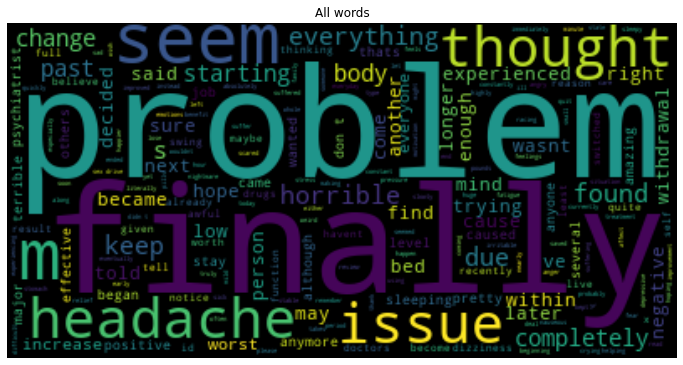

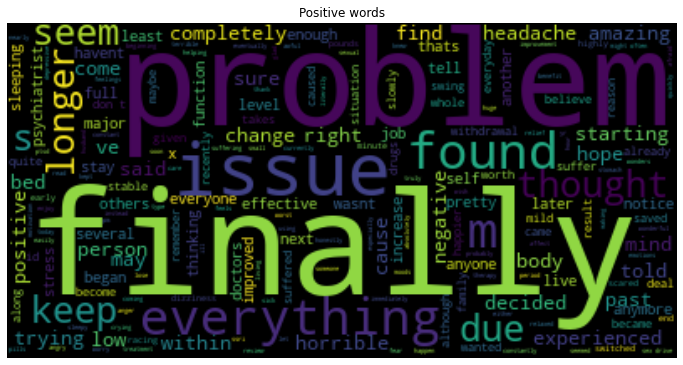

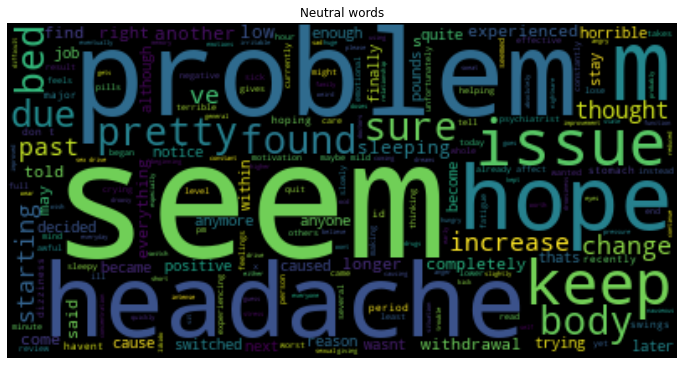

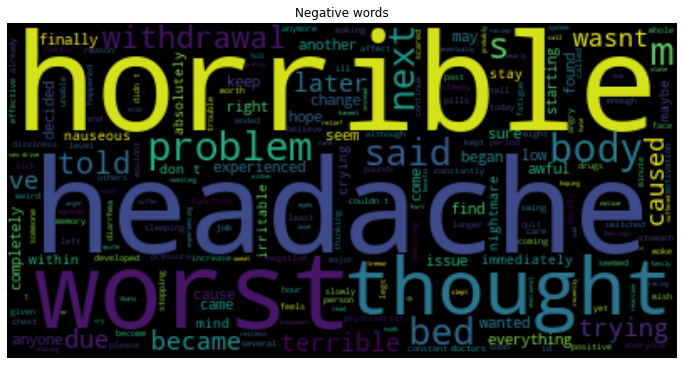

In [170]:
display_wordcloud([0,1,2,3], [words_as_string, poswords_as_string, neutralwords_as_string, negwords_as_string], \
                  ["All words","Positive words", "Neutral words","Negative words"])

### **Frequency distribution(2) - after cleaning**

In [171]:
# getting 50 most common words
print("Most frequent 50 words: \n",freqdist(words_as_string, 50)) 
print("\nMost frequent 50 positive words: \n",freqdist(poswords_as_string, 50))
print("\nMost frequent 50 neutral words: \n",freqdist(neutralwords_as_string, 50))
print("\nMost frequent 50 negative words: \n",freqdist(negwords_as_string, 50))

Most frequent 50 words: 
 [('finally', 800), ('thought', 670), ('i\x92m', 640), ('found', 587), ('body', 585), ('everything', 576), ('due', 545), ('within', 542), ('completely', 537), ('right', 531), ('find', 518), ('horrible', 518), ('bed', 515), ('starting', 513), ('experienced', 504), ('mind', 500), ('trying', 493), ('hope', 490), ('low', 488), ('longer', 486), ('said', 482), ('told', 475), ('past', 473), ('problems', 469), ('issues', 466), ('sleeping', 466), ('may', 464), ('keep', 458), ('wasnt', 451), ('change', 441), ('later', 440), ('headaches', 440), ('sure', 433), ('decided', 431), ('negative', 419), ('positive', 417), ('person', 412), ('next', 405), ('anyone', 399), ('it\x92s', 398), ('stomach', 397), ('became', 397), ('another', 395), ('enough', 393), ('seems', 387), ('psychiatrist', 383), ('anymore', 377), ('problem', 373), ('began', 370), ('stay', 367)]

Most frequent 50 positive words: 
 [('finally', 621), ('thought', 409), ('found', 404), ('everything', 382), ('i\x92m', 

### **Splitting data**

In [172]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# splitting the data per disease
xs = []
ys = []
for i in diseases:   #sorting by disease for the conclusion at the end
  X = data.loc[data["Drug"] == i,"Review"]
  xs.append(X)
  y = data.loc[data["Drug"] == i,"Sentiment"]
  ys.append(y)

#The resulting sets for train, test and val data. Saved in the order of the diseases list from the beginning
testSet= [] 
trainSet = []

for i in range(len(diseases)):
  print(diseases[i])
  X = xs[i]
  y = ys[i]
  print("Shape of X and y: ",X.shape,y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) 
  print(f"X_train: {X_train.shape}, X_test: {X_test.shape}") # 80 % training data, 10 % test data, 10 % validation data
  
  trainSet.append((X_train, y_train))
  testSet.append((X_test, y_test))

ADHD
Shape of X and y:  (1913,) (1913,)
X_train: (1530,), X_test: (383,)
Anxiety
Shape of X and y:  (3841,) (3841,)
X_train: (3072,), X_test: (769,)
Bipolar
Shape of X and y:  (2267,) (2267,)
X_train: (1813,), X_test: (454,)
Depression
Shape of X and y:  (2633,) (2633,)
X_train: (2106,), X_test: (527,)
Schizophrenia
Shape of X and y:  (383,) (383,)
X_train: (306,), X_test: (77,)


### **Vectorization after splitting data**

In [182]:
# Transformation after splitting data: 
tfs = []

for i in range(len(diseases)):
  print(diseases[i])
  #We need a new vectorizer for each disease for the analysis at the end
  tfidf  = TfidfVectorizer(ngram_range=(1,1),min_df=3) #min_df = 5 means that terms which occur in less than 5 documents are ignored
  X_train = trainSet[i][0]
  X_test = testSet[i][0]

  # fitting training data 
  vector_data_train = X_train.str.join(" ") # The vectorizer needs whole sentences to find the occurences
  tfidf_vectors_train = tfidf.fit_transform(vector_data_train) # Use the build in functions to determine the values
  #df_train = pd.DataFrame(tfidf_vectors_train[0].T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"]) #Showing the transformation for the first entry
  #print("Training data: \n",df_train.sort_values(by = ["tfidf"],ascending=False))
  print(f"shape tfidf training data: {tfidf_vectors_train.shape}")

  # fitting test data 
  vector_data_test = X_test.str.join(" ") # The vectorizer needs whole sentences to find the occurences
  tfidf_vectors_test = tfidf.transform(vector_data_test) # Use the build in functions to determine the values
  #df_test = pd.DataFrame(tfidf_vectors_test[0].T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"]) #Showing the transformation for the first entry
  #print("Test data: \n",df_test.sort_values(by = ["tfidf"],ascending=False))
  print(f"shape tfidf test data: {tfidf_vectors_test.shape}\n")

  tfs.append((tfidf, tfidf_vectors_train, tfidf_vectors_test)) #Save the changed data for the models as tuple to differ between the diseases



ADHD
shape tfidf training data: (1530, 1973)
shape tfidf test data: (383, 1973)

Anxiety
shape tfidf training data: (3072, 2555)
shape tfidf test data: (769, 2555)

Bipolar
shape tfidf training data: (1813, 2010)
shape tfidf test data: (454, 2010)

Depression
shape tfidf training data: (2106, 2212)
shape tfidf test data: (527, 2212)

Schizophrenia
shape tfidf training data: (306, 516)
shape tfidf test data: (77, 516)



### **Building model**

#### **Random Forest**

Random Forest without Balancing data

In [ ]:


# best parameters: 
# max_depth = 100
# min_samples_split = 2
# n_estimators = 500

In [ ]:
results = pd.DataFrame()
results["Diseases"] = diseases
print(results)

####Random Forest with balancing data

ADHD
Classification Report:                precision    recall  f1-score   support

    negative       0.63      0.48      0.54       108
     neutral       0.23      0.10      0.13        63
    positive       0.66      0.85      0.74       212

    accuracy                           0.62       383
   macro avg       0.51      0.48      0.47       383
weighted avg       0.58      0.62      0.59       383



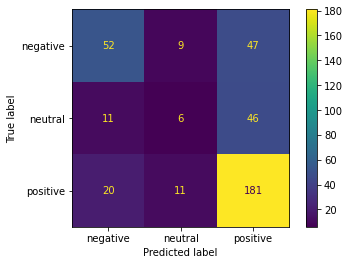

Training accuracy: 0.9842342342342343
Test accuracy: 0.6240208877284595

Anxiety
Classification Report:                precision    recall  f1-score   support

    negative       0.39      0.55      0.45       150
     neutral       0.17      0.04      0.07        89
    positive       0.78      0.79      0.79       530

    accuracy                           0.66       769
   macro avg       0.45      0.46      0.44       769
weighted avg       0.64      0.66      0.64       769



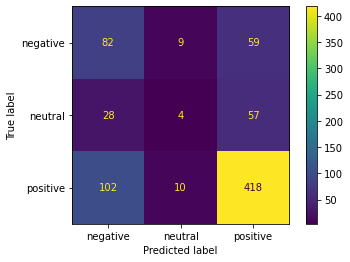

Training accuracy: 0.9767636242059512
Test accuracy: 0.6553966189856957

Bipolar
Classification Report:                precision    recall  f1-score   support

    negative       0.45      0.55      0.49       104
     neutral       0.13      0.06      0.09        62
    positive       0.76      0.78      0.77       288

    accuracy                           0.63       454
   macro avg       0.45      0.46      0.45       454
weighted avg       0.60      0.63      0.61       454



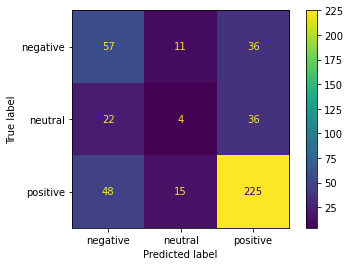

Training accuracy: 0.9917184265010351
Test accuracy: 0.6299559471365639

Depression
Classification Report:                precision    recall  f1-score   support

    negative       0.43      0.47      0.45       112
     neutral       0.26      0.09      0.13        92
    positive       0.71      0.82      0.76       323

    accuracy                           0.62       527
   macro avg       0.47      0.46      0.45       527
weighted avg       0.57      0.62      0.59       527



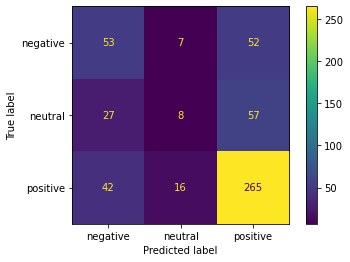

Training accuracy: 0.9927596769702033
Test accuracy: 0.618595825426945

Schizophrenia
Classification Report:                precision    recall  f1-score   support

    negative       0.48      0.48      0.48        29
     neutral       0.27      0.44      0.33        18
    positive       0.56      0.33      0.42        30

    accuracy                           0.42        77
   macro avg       0.43      0.42      0.41        77
weighted avg       0.46      0.42      0.42        77



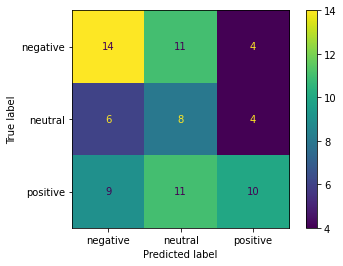

Training accuracy: 0.975609756097561
Test accuracy: 0.4155844155844156



In [183]:
rfs = [] # List containing the resulting models per disease for Random Forests
from sklearn.metrics import ConfusionMatrixDisplay
#Random Forest takse a very long time! Keep in mind
from sklearn.model_selection import cross_val_score
for i in range(len(diseases)): 
  print(diseases[i])

  #Retrieve the necessary values per disease
  tfidf_vectors_train = tfs[i][1]
  y_train = trainSet[i][1]
  
  ros = RandomOverSampler(random_state=42)
  tfidf_vectors_train, y_train= ros.fit_resample(tfidf_vectors_train, y_train)

  tfidf_vectors_test = tfs[i][2]
  y_test = testSet[i][1]

  rf_classifier = RandomForestClassifier(max_depth=100,n_estimators=500)# estimators based on the grid search10

  rf_classifier.fit(tfidf_vectors_train, y_train) # fitting training data 

  y_pred = rf_classifier.predict(tfidf_vectors_test)
  report = classification_report(y_test,y_pred, target_names=['negative', 'neutral', 'positive'], zero_division= 0)
  print('Classification Report: ', report)

  cf_matrix = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['negative', 'neutral', 'positive'])
  display.plot()
  plt.show()

  score_train = rf_classifier.score(tfidf_vectors_train, y_train) # training accuracy -> lol this is clearly overfitting rn
  print(f"Training accuracy: {score_train}")
  score_test = rf_classifier.score(tfidf_vectors_test, y_test) # test accuracy -> not too bad :) 
  print(f"Test accuracy: {score_test}") 

  rfs.append(rf_classifier) #Save the models for plotting afterwards
  print("")

#### **Naive Bayes**


Naive Bayes with balancing data

ADHD
Classification report:                precision    recall  f1-score   support

    negative       0.54      0.53      0.53       108
     neutral       0.25      0.43      0.31        63
    positive       0.80      0.63      0.71       212

    accuracy                           0.57       383
   macro avg       0.53      0.53      0.52       383
weighted avg       0.64      0.57      0.59       383



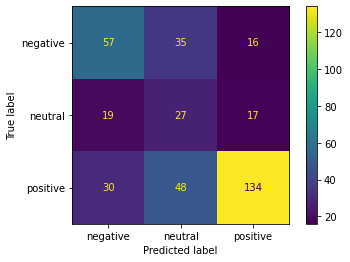

Training accuracy: 0.896021021021021
Test accuracy: 0.5691906005221932

Anxiety
Classification report:                precision    recall  f1-score   support

    negative       0.48      0.59      0.53       150
     neutral       0.12      0.19      0.15        89
    positive       0.83      0.70      0.76       530

    accuracy                           0.62       769
   macro avg       0.48      0.49      0.48       769
weighted avg       0.68      0.62      0.64       769



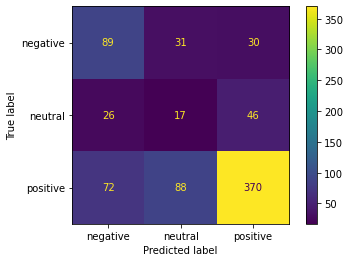

Training accuracy: 0.8615847542627884
Test accuracy: 0.6189856957087126

Bipolar
Classification report:                precision    recall  f1-score   support

    negative       0.52      0.52      0.52       104
     neutral       0.25      0.39      0.30        62
    positive       0.79      0.70      0.74       288

    accuracy                           0.62       454
   macro avg       0.52      0.54      0.52       454
weighted avg       0.66      0.62      0.63       454



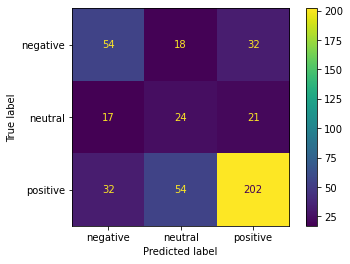

Training accuracy: 0.891156462585034
Test accuracy: 0.6167400881057269

Depression
Classification report:                precision    recall  f1-score   support

    negative       0.46      0.56      0.50       112
     neutral       0.30      0.37      0.33        92
    positive       0.78      0.67      0.72       323

    accuracy                           0.60       527
   macro avg       0.51      0.53      0.52       527
weighted avg       0.63      0.60      0.61       527



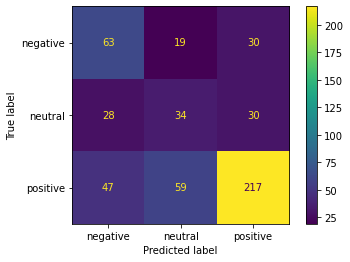

Training accuracy: 0.8788638262322472
Test accuracy: 0.5958254269449715

Schizophrenia
Classification report:                precision    recall  f1-score   support

    negative       0.58      0.52      0.55        29
     neutral       0.28      0.39      0.33        18
    positive       0.62      0.53      0.57        30

    accuracy                           0.49        77
   macro avg       0.49      0.48      0.48        77
weighted avg       0.52      0.49      0.50        77



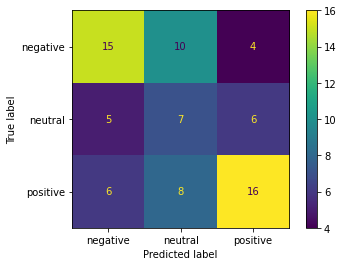

Training accuracy: 0.8861788617886179
Test accuracy: 0.4935064935064935



In [184]:
nbs =[] # List containing the resulting models per disease for Naive Bayes
for i in range(len(diseases)):
  print(diseases[i])

  #Retrieve the necessary values per disease
  tfidf_vectors_train = tfs[i][1]
  y_train = trainSet[i][1]

  tfidf_vectors_test = tfs[i][2]
  y_test = testSet[i][1]


  ros = RandomOverSampler(random_state=42)
  tfidf_vectors_train, y_train= ros.fit_resample(tfidf_vectors_train, y_train)


  nb_classifier = MultinomialNB()

  nb_classifier.fit(tfidf_vectors_train, y_train)

  y_pred = nb_classifier.predict(tfidf_vectors_test)
  report = classification_report(y_test,y_pred, target_names=['negative', 'neutral', 'positive'], zero_division= 0)
  print('Classification report: ', report)
  
  cf_matrix = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['negative', 'neutral', 'positive'])
  display.plot()
  plt.show()

  score_train = nb_classifier.score(tfidf_vectors_train, y_train) 
  print(f"Training accuracy: {score_train}")
  score_test = nb_classifier.score(tfidf_vectors_test, y_test)
  print(f"Test accuracy: {score_test}") 

  nbs.append(nb_classifier)#Save the models for plotting afterwards
  print("")

#**Here you can now see the most important features for the Naive bayes divided into the 3 different categories and the Random Forestm per disease.**# 
Now You can do some experimenting, with taking out some words to see which affect the results and which just seem to not belong there. Like in this case, "get" and "started"

### **Code for plotting**

In [ ]:
import seaborn as sns

def impPlot(importances,names, title, quant): #Function to simply plot the words with the corresponding importances (not important to understand for the course if wanted to, just ask)
  if(quant > 1):
    fig, ax = plt.subplots(1,quant,figsize=(24,8))
    fig.suptitle(title[0])
    for i in range(quant):
      imp = np.array(importances[i])
      n = np.array(names[i])

      data={'feature_names':n,'feature_importance':imp}
      fi_df = pd.DataFrame(data)
      fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

      sns.barplot(ax=ax[i], x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
      ax[i].set_title(title[i+1])
    plt.show()
  else:
    imp = np.array(importances)
    n = np.array(names)
    
    data={'feature_names':n,'feature_importance':imp}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    plt.title(title)

    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    plt.show()

###**Plotting the feature importances**

ADHD


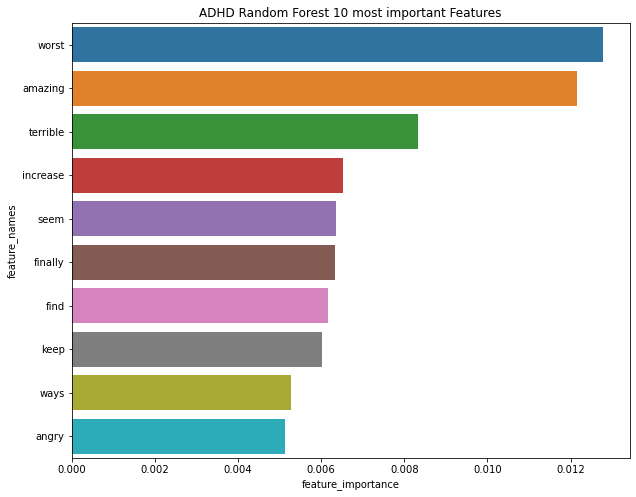

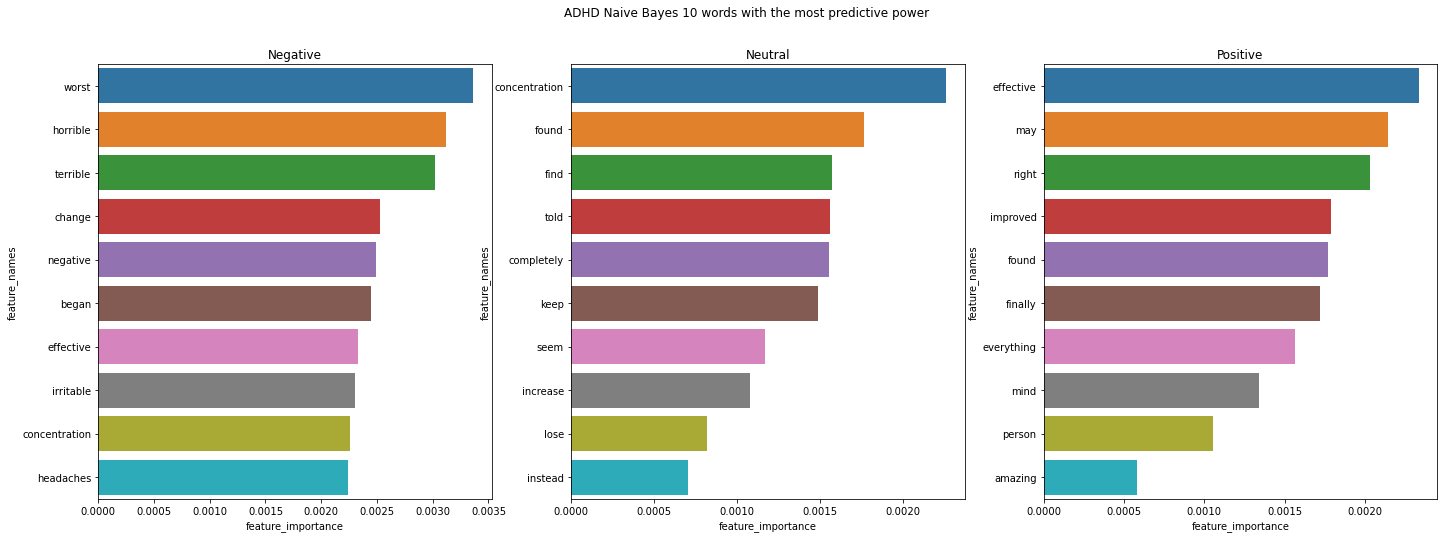


Anxiety


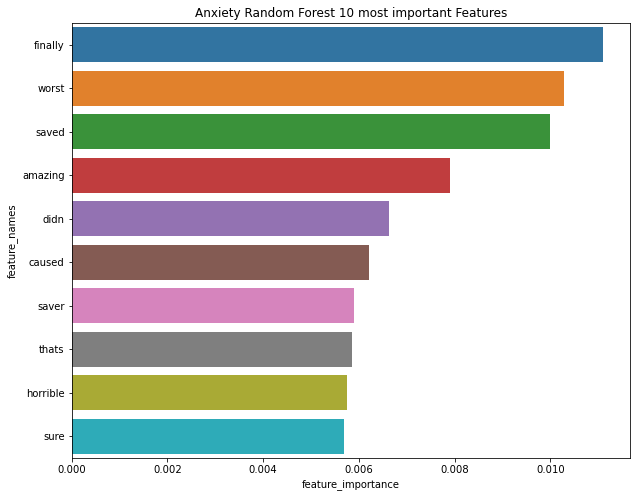

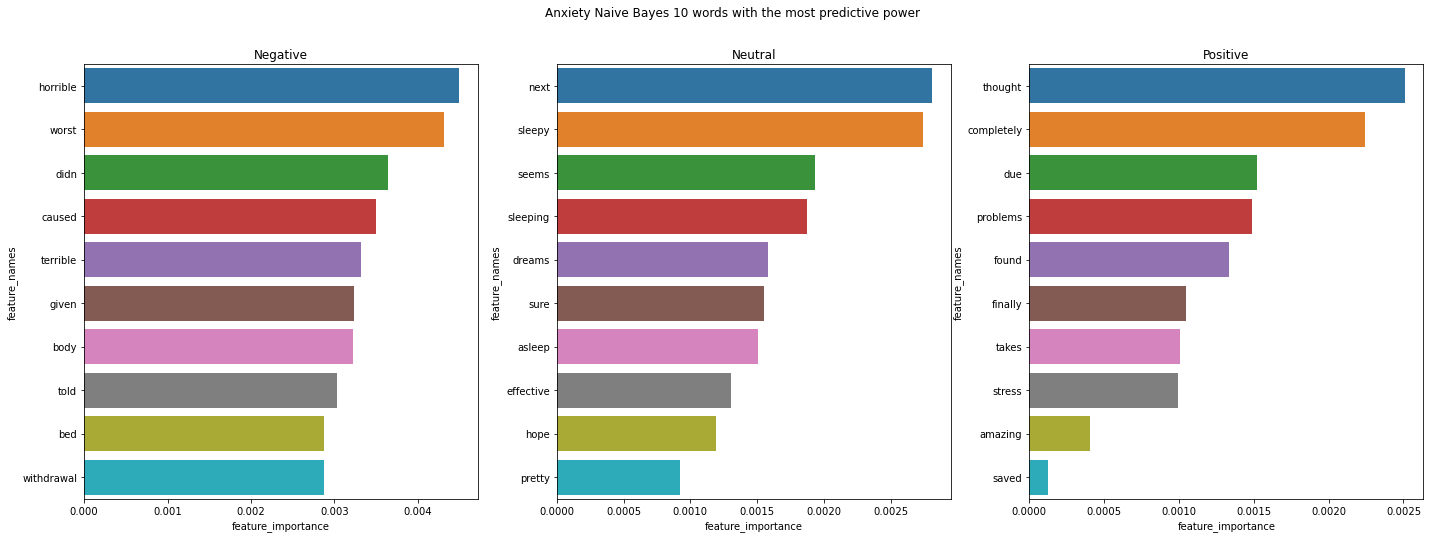


Bipolar


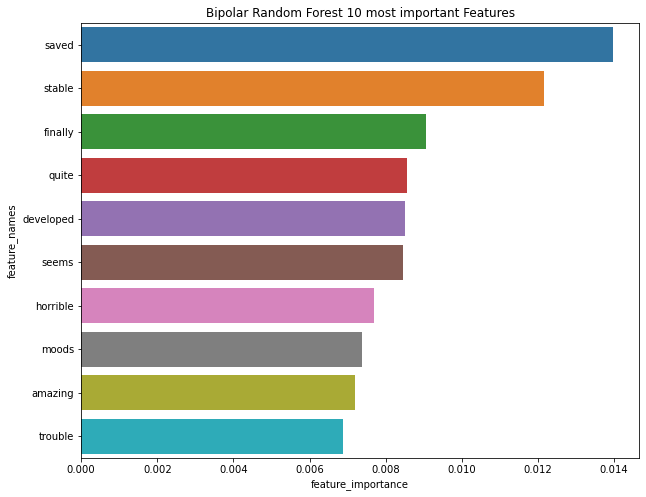

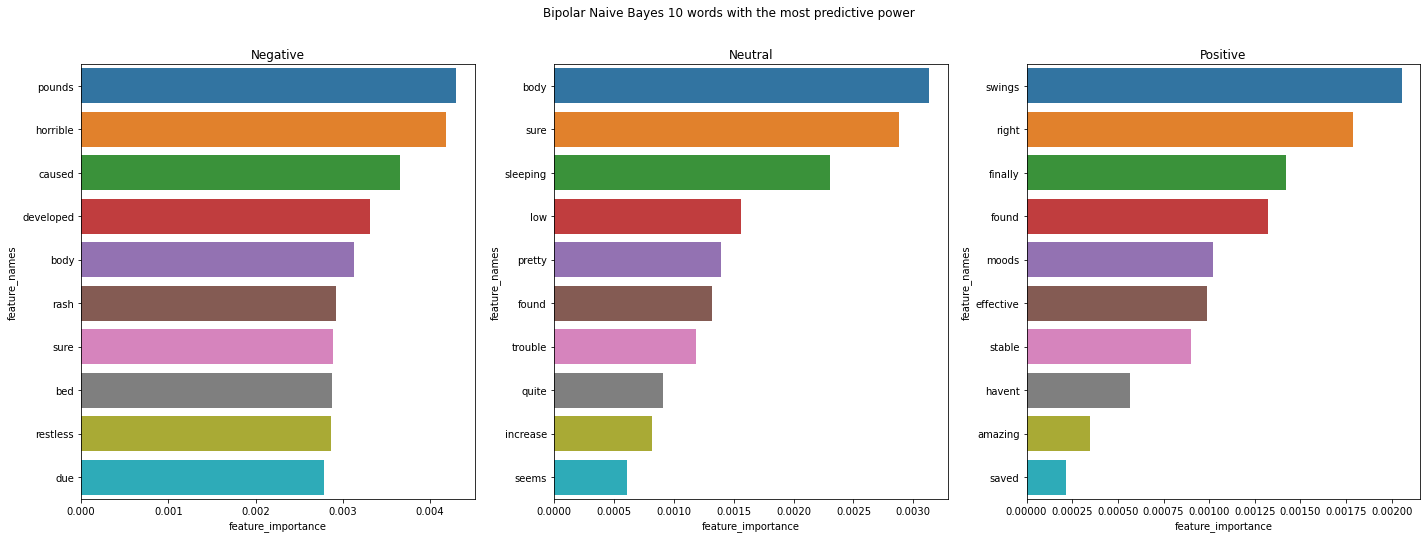


Depression


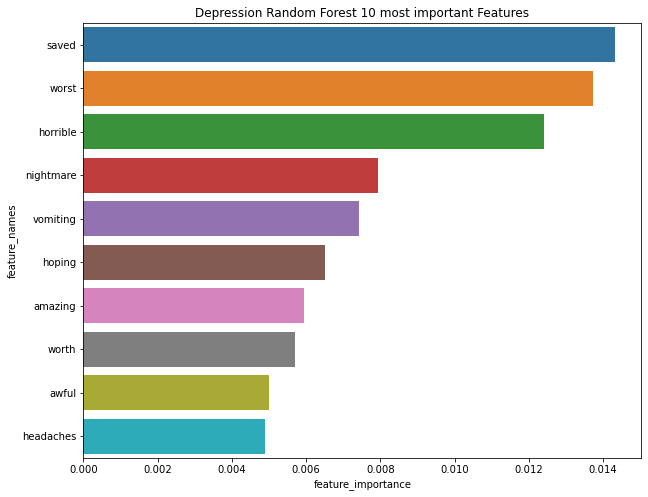

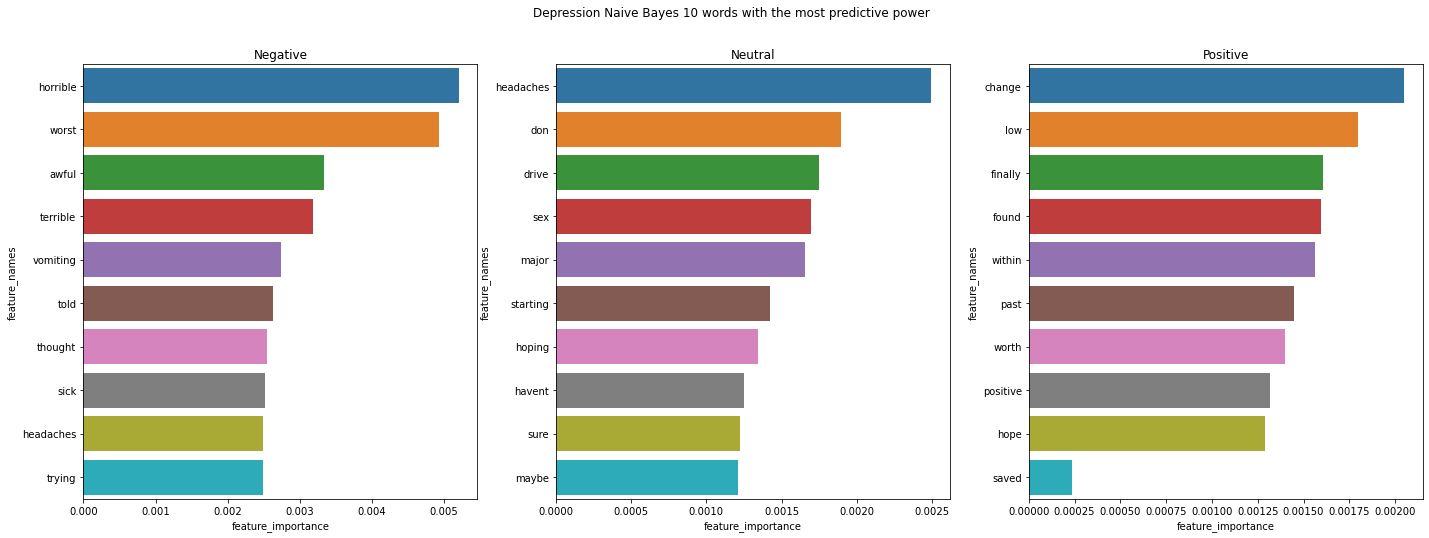


Schizophrenia


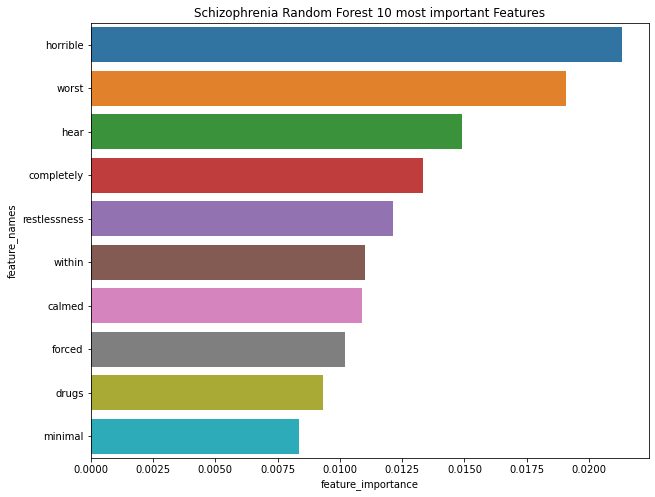

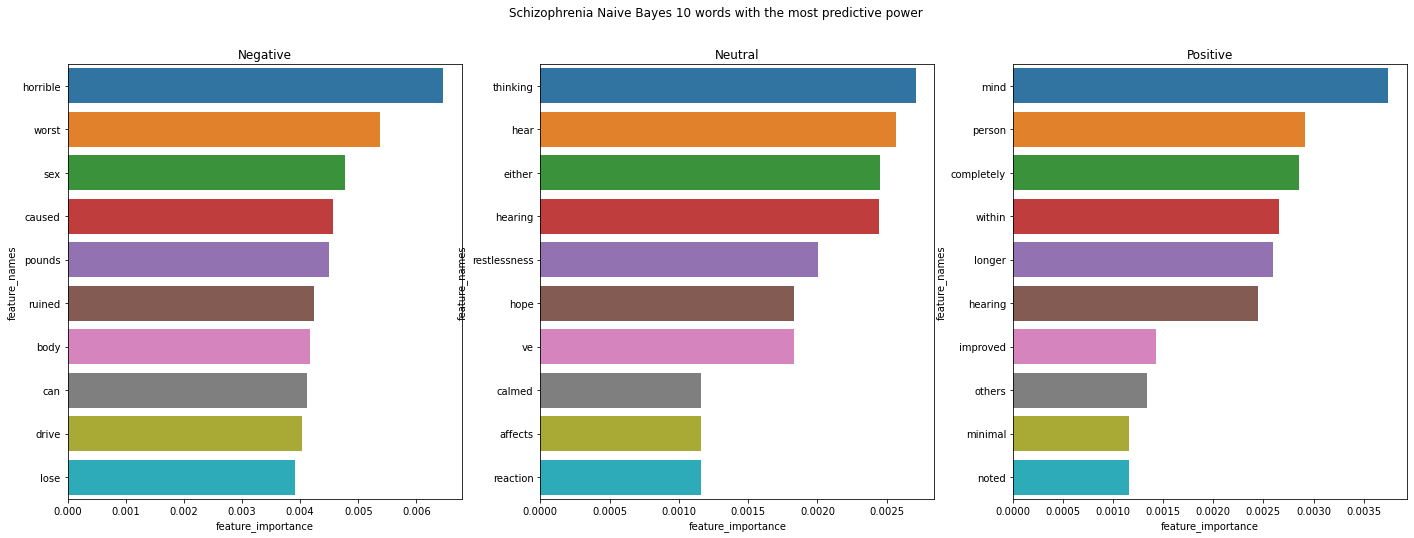

In [185]:
for i in range(len(diseases)):
  print(diseases[i])
  #Retrieving the necessary data for the plots(models and vectorizer)
  rf_classifier = rfs[i]
  nb_classifier = nbs[i]
  tfidf = tfs[i][0]

  #Plotting the Random Forest important features
  impPlot(rf_classifier.feature_importances_, tfidf.get_feature_names_out(),f"{diseases[i]} Random Forest 10 most important Features",1)

  #These give us the indices for the features that have the most predictive power in our Naive Bayes model.
  neg_class_prob_sorted = nb_classifier.feature_log_prob_[0, :].argsort()[::-1] 
  neut_class_prob_sorted = nb_classifier.feature_log_prob_[1, :].argsort()[::-1]
  pos_class_prob_sorted = nb_classifier.feature_log_prob_[2, :].argsort()[::-1]


  #We put all the values necessary into lists to forward them into the function defined at the beginning of this section.
  combImp = [np.exp(nb_classifier.feature_log_prob_[0, neg_class_prob_sorted[:10]]),np.exp(nb_classifier.feature_log_prob_[0, neut_class_prob_sorted[:10]]),np.exp(nb_classifier.feature_log_prob_[0, pos_class_prob_sorted[:10]])]
  combName = [np.take(tfidf.get_feature_names_out(), neg_class_prob_sorted[:10]), np.take(tfidf.get_feature_names_out(), neut_class_prob_sorted[:10]), np.take(tfidf.get_feature_names_out(), pos_class_prob_sorted[:10])]
  impPlot(combImp,combName,[f"{diseases[i]} Naive Bayes 10 words with the most predictive power","Negative","Neutral","Positive"],3)
  print("") #a small space to not overfill the inteface

## Vectorization TF-IDF

Transforming words to a vector, because ML algorithms work with numbers. 
All data is divided over documents, and you compare those documents to see if a word is important or not. Words like "is", "are", "that" will probabably be common in all documents. This means that these words will not have a high value. 


TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

tf(t,d) = count of t in d / number of words in d

df(t) = occurrence of t in N documents  --> take inverse of this one

idf(t) = N/df

t — term (word)

d — document (set of words)

N — number of documents

How to do it in Python:
- https://analyticsindiamag.com/hands-on-implementation-of-tf-idf-from-scratch-in-python/
- https://www.askpython.com/python/examples/tf-idf-model-from-scratch

https://monkeylearn.com/blog/what-is-tf-idf/

https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089 



## **Resources to give inspiration on what to do:**
* sentiment analysis - NLTK (very detailed) <br>
https://medium.datadriveninvestor.com/python-data-science-getting-started-tutorial-nltk-2d8842fedfdd

* sentiment analysis - NLTK (brief overview) <br>
https://www.analyticsvidhya.com/blog/2021/06/sentiment-analysis-using-nltk-a-practical-approach/ <br><br>
https://realpython.com/python-nltk-sentiment-analysis/


* example of sentiment analysis on drugs.com <br>
https://www.researchgate.net/profile/Irena-Spasic/publication/344014997_Improving_the_performance_of_sentiment_analysis_in_health_and_wellbeing_using_domain_knowledge/links/5f4e0bc9458515a88ba6a072/Improving-the-performance-of-sentiment-analysis-in-health-and-wellbeing-using-domain-knowledge.pdf

* Federicos code <br>
https://colab.research.google.com/drive/13k1FF9Kx33dtrtwQ-_NXWhg-xk_Dz-U9


